# **ML_Project**

## **Data Preparation**

### Loading data

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


###assigning data


In [2]:
X = df.drop('logS', axis = 1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [3]:
y = df['logS']
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


### data splitting

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

In [5]:
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [6]:
X_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


##Linear Regression


### **Training the model**

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Prediction

In [8]:
y_lr_X_train = model.predict(X_train)
y_lr_X_test = model.predict(X_test)

### Model performance

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

lr_mse_train = mean_squared_error(y_train, y_lr_X_train)
lr_r2_train = r2_score(y_train, y_lr_X_train)
lr_mse_test = mean_squared_error(y_test, y_lr_X_test)
lr_r2_test = r2_score(y_test, y_lr_X_test)

In [10]:
lr_mse_train

1.0075362951093687

In [11]:
lr_data_frame = pd.DataFrame(['Linear Regression', lr_mse_train, lr_r2_train, lr_mse_test, lr_r2_test]).transpose()
lr_data_frame.columns = ['ML Model', 'MSE Train', 'R2 Train', 'MSE Test', 'R2 Test']

In [12]:
lr_data_frame

,ML Model,MSE Train,R2 Train,MSE Test,R2 Test
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## Random Forrest

### Training the model

In [13]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(max_depth = 2, random_state = 100)
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Prediction

In [14]:
y_rf_X_train = model_rf.predict(X_train)
y_rf_X_test = model_rf.predict(X_test)

### Model Performance

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

rf_mse_train = mean_squared_error(y_train, y_rf_X_train)
rf_r2_train = r2_score(y_train, y_rf_X_train)
rf_mse_test = mean_squared_error(y_test, y_rf_X_test)
rf_r2_test = r2_score(y_test, y_rf_X_test)

In [16]:
rf_data_frame = pd.DataFrame(['Random Forrest', rf_mse_train, rf_r2_train, rf_mse_test, rf_r2_test]).transpose()
rf_data_frame.columns = ['ML Model', 'MSE Train', 'R2 Train', 'MSE Test', 'R2 Test']
rf_data_frame

,ML Model,MSE Train,R2 Train,MSE Test,R2 Test
0,Random Forrest,1.028228,0.759669,1.407688,0.709223


### Model Comparison

In [17]:
result = pd.concat([lr_data_frame, rf_data_frame],axis = 0)
result.reset_index(drop = 'True')

,ML Model,MSE Train,R2 Train,MSE Test,R2 Test
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forrest,1.028228,0.759669,1.407688,0.709223


## Data visualization of results

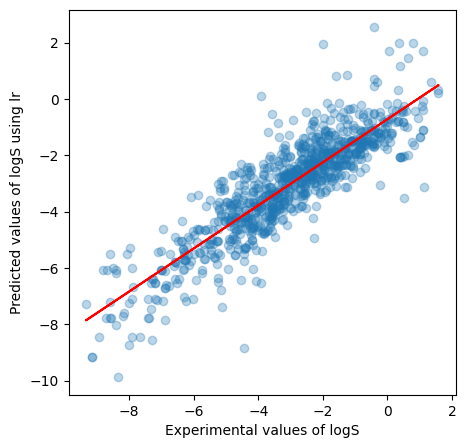

In [24]:
import matplotlib.pyplot as plt
import numpy as np

z = np.polyfit(y_train, y_lr_X_train,1)
p = np.poly1d(z)

plt.figure(figsize = (5,5))
plt.scatter(y_train, y_lr_X_train, alpha = 0.3)
plt.xlabel('Experimental values of logS')
plt.ylabel('Predicted values of logS using lr')
plt.plot(y_train, p(y_train), c='r')

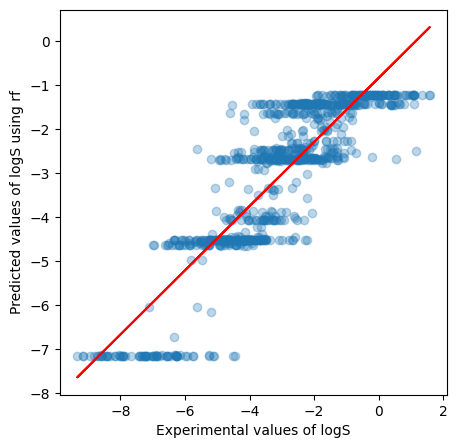

In [25]:
t = np.polyfit(y_train, y_rf_X_train,1)
b = np.poly1d(t)

plt.figure(figsize = (5,5))
plt.scatter(y_train, y_rf_X_train, alpha = 0.3)
plt.xlabel('Experimental values of logS')
plt.ylabel('Predicted values of logS using rf')
plt.plot(y_train, b(y_train), c='r')